In [92]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy import signal
from scipy.io import wavfile
import io
from PIL import Image
import librosa

test_file = '/home/george-vengrovski/Documents/canary_segments_generation/llb3_0002_2018_04_23_14_18_03.wav'

#### For tuning parameters on a test file, and defining several functions

ms per x pixels: 5.239069721152709


/tmp/ipykernel_14764/3338548597.py:32: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  ms_per_x_pixels = (librosa.get_duration(filename=test_file) * 1000) / np_sonogram.shape[1]


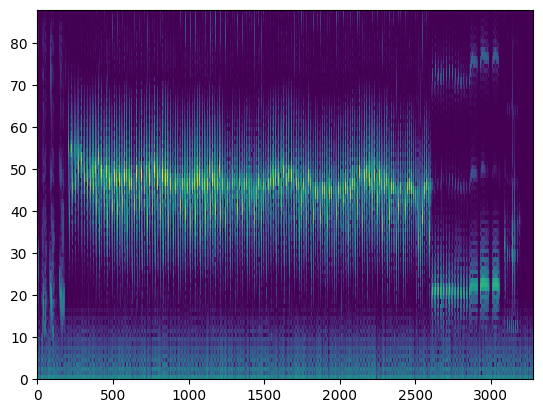

In [104]:
# create sonogram of the whole song 
 
# wav to numpy array
def wav_to_numpy(file):
    rate, data = wavfile.read(file)
    return rate, data

def createSonogram(songfile, show_plot=False):
    data = wav_to_numpy(songfile)
    rate = data[0]
    data = data[1]

    f, t, Sxx = signal.spectrogram(data, rate, nfft=512, noverlap=25, scaling="density")

    fmin = 400 # Hz
    fmax = 8000 # Hz
    freq_slice = np.where((f >= fmin) & (f <= fmax))

    # keep only frequencies of interest
    f   = f[freq_slice]
    Sxx = Sxx[freq_slice,:][0]

    Sxx = np.log(Sxx + 1)

    np_sonogram = np.array(Sxx, dtype="float32")
    
    return np_sonogram 


# use test file to determine how many ms per x pixels
np_sonogram = createSonogram(test_file)
ms_per_x_pixels = (librosa.get_duration(filename=test_file) * 1000) / np_sonogram.shape[1]
print(f"ms per x pixels: {ms_per_x_pixels}")

plt.pcolormesh(np_sonogram)

(60, 3282)


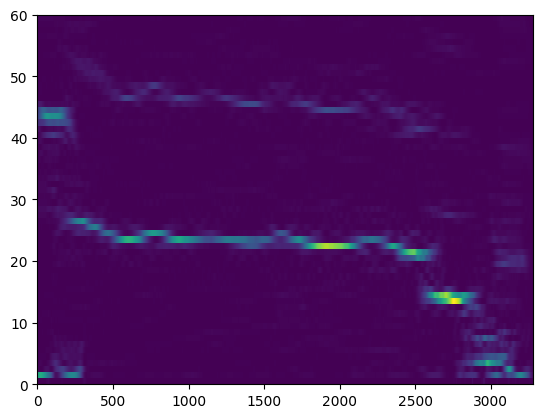

In [102]:
def create_rhythmicity(np_sonogram, threshold=100, nfft=256, rythm_y_axis_crop=60):
    # reverse the axis of the np array dim1 becomes dim 0 and vice versa
    np_sonogram = np_sonogram.T

    vertical_sum = np.sum(np_sonogram, axis=1)

    # for every vertical sum if below 100, set to 0
    for i in range(len(vertical_sum)):
        if vertical_sum[i] < threshold:
            vertical_sum[i] = 0

    # pad because the fft crops the edges by nfft/2
    vertical_sum_padded = np.zeros((len(vertical_sum) + nfft))
    nfft_half = nfft/2
    vertical_sum_padded[0:128] = 0
    vertical_sum_padded[-128:] = 0
    vertical_sum_padded[128:-128] = vertical_sum




    # log to make plot y axis clearer 
    vertical_sum_padded = np.log(vertical_sum_padded + 1)
    f, t, Sxx = signal.spectrogram(vertical_sum_padded, 1, nfft=nfft, noverlap=255, scaling="density")
    Sxx = Sxx[:rythm_y_axis_crop]
    print(Sxx.shape)

    # interporlated Sxx is equal to Sxx but remove last element from 1st axis
    interpolated_Sxx = Sxx.T
    interpolated_Sxx = interpolated_Sxx[:-1]

    return interpolated_Sxx.T

interpolated_Sxx = create_rhythmicity(np_sonogram)
plt.pcolormesh(interpolated_Sxx)


## Generating spectograms and the correspond rhythmicity spectogram 

In [116]:
## Explanation ##
# - For every song in canary data, we generate a spectrogram and a rhythmicity spec 
# - each will be named after the song number and saved in the respective folder  
# - will be saved as a np array

import math 
rhytm_dir = '/home/george-vengrovski/Documents/canary_segments_generation/windows/rhytm'
specs_dir = '/home/george-vengrovski/Documents/canary_segments_generation/windows/specs'
canary_data = '/home/george-vengrovski/Documents/canary_segments_generation/canary_data'

# stride in ms 
stride_ms = 10
pixel_stride = np.round(stride_ms / ms_per_x_pixels, 0).astype(int)

# calcualting window size 
ms_per_window = 256 
window_size = np.round(ms_per_window / ms_per_x_pixels).astype(int)

# loop over songs in canary data 
for song in os.listdir(canary_data):
    try:
        song_name = song.split('_')[1]
        song_path = os.path.join(canary_data, song)

        # create sonogram and rhythmicity spec by sliding a window
        np_sonogram = createSonogram(song_path)
        interpolated_Sxx = create_rhythmicity(np_sonogram)

        length = np_sonogram.shape[1]

        # slide window across length

        for i in range(0, length, pixel_stride):
            spec = np_sonogram[:, i:i+window_size]
            rhytm = interpolated_Sxx[:, i:i+window_size]

            # save spec and rhytm
            spec_path = os.path.join(specs_dir, f"{song_name}_{i}.npy")
            rhytm_path = os.path.join(rhytm_dir, f"{song_name}_{i}.npy")

            np.save(spec_path, spec)
            np.save(rhytm_path, rhytm)

    # just in case a file in the folder is not a song or song is corrupted 
    except Exception as e:
        print(e)
        print(song)
        continue

(60, 1809)
(60, 496)
(60, 582)
(60, 1066)
(60, 3888)
(60, 1295)
(60, 1294)
(60, 4693)
(60, 4176)
(60, 1607)
(60, 1924)
(60, 3043)
(60, 764)
(60, 5002)
(60, 4451)
(60, 892)
(60, 508)
(60, 1722)
(60, 985)
(60, 523)
(60, 496)
(60, 1308)
(60, 372)
(60, 3239)
(60, 507)
(60, 503)
(60, 1282)
(60, 1588)
(60, 3036)
(60, 1152)
(60, 1358)
(60, 491)
(60, 1397)
(60, 4406)
(60, 952)
(60, 814)
(60, 473)
(60, 6114)
(60, 3934)
(60, 519)
(60, 475)
(60, 550)
(60, 469)
(60, 4743)
(60, 1301)
(60, 508)
(60, 308)
(60, 516)
(60, 5067)
(60, 1040)
(60, 1290)
(60, 1839)
(60, 2342)
(60, 501)
(60, 3117)
(60, 1451)
(60, 842)
(60, 3064)
(60, 518)
(60, 446)
(60, 484)
(60, 4367)
(60, 4927)
(60, 491)
(60, 1482)
(60, 648)
(60, 485)
(60, 507)
(60, 498)
(60, 2331)
(60, 1025)
(60, 990)
(60, 507)
(60, 1459)
(60, 271)
(60, 1425)
(60, 523)
(60, 1188)
(60, 627)
(60, 996)
(60, 3023)
(60, 497)
(60, 1488)
(60, 583)
(60, 496)
(60, 486)
(60, 1443)
(60, 389)
(60, 4475)
(60, 4110)
(60, 3838)
(60, 2085)
(60, 2727)
(60, 998)
(60, 706)


## This is for removing blank spaces between syllables

In [ ]:
from matplotlib.pyplot import axis 

window_size = 1
threshold = 0

# window slides over vertical sum, takes the average and keeps it if it is above threshold
def sliding_window_average(vertical_sum, window_size, threshold):
    window = np.ones(int(window_size))/float(window_size)
    y = np.convolve(vertical_sum, window, 'same')
    y = np.where(y > threshold, y, 0)
    return y

y = sliding_window_average(vertical_sum, window_size, threshold)

# get the indices of the locations where the vertical sum is above threshold
indices = np.where(y > 0)[0]
plt.figure(figsize=(50,5))
plt.imshow(np_sonogram[indices].T, origin='lower')